Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any 4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in docker and use some library to display that in frontend

In [56]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [57]:
df = pd.read_csv("data\Loan_Train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df = df.drop(labels=['Loan_ID'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
import statistics as st
df["Gender"] = df["Gender"].fillna(st.mode(df["Gender"]))
df["Married"] = df["Married"].fillna(st.mode(df["Married"]))
df["Self_Employed"] = df["Self_Employed"].fillna(st.mode(df["Self_Employed"]))

In [61]:
import numpy as np
df["LoanAmount"] = df["LoanAmount"].fillna(np.nanmedian(df["LoanAmount"]))
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(np.nanmedian(df["Loan_Amount_Term"]))
df["Credit_History"] = df["Credit_History"].fillna(np.nanmedian(df["Credit_History"]))

In [62]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = df.select_dtypes(include='object') .columns
numerical_cols = df.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
categorical columns:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


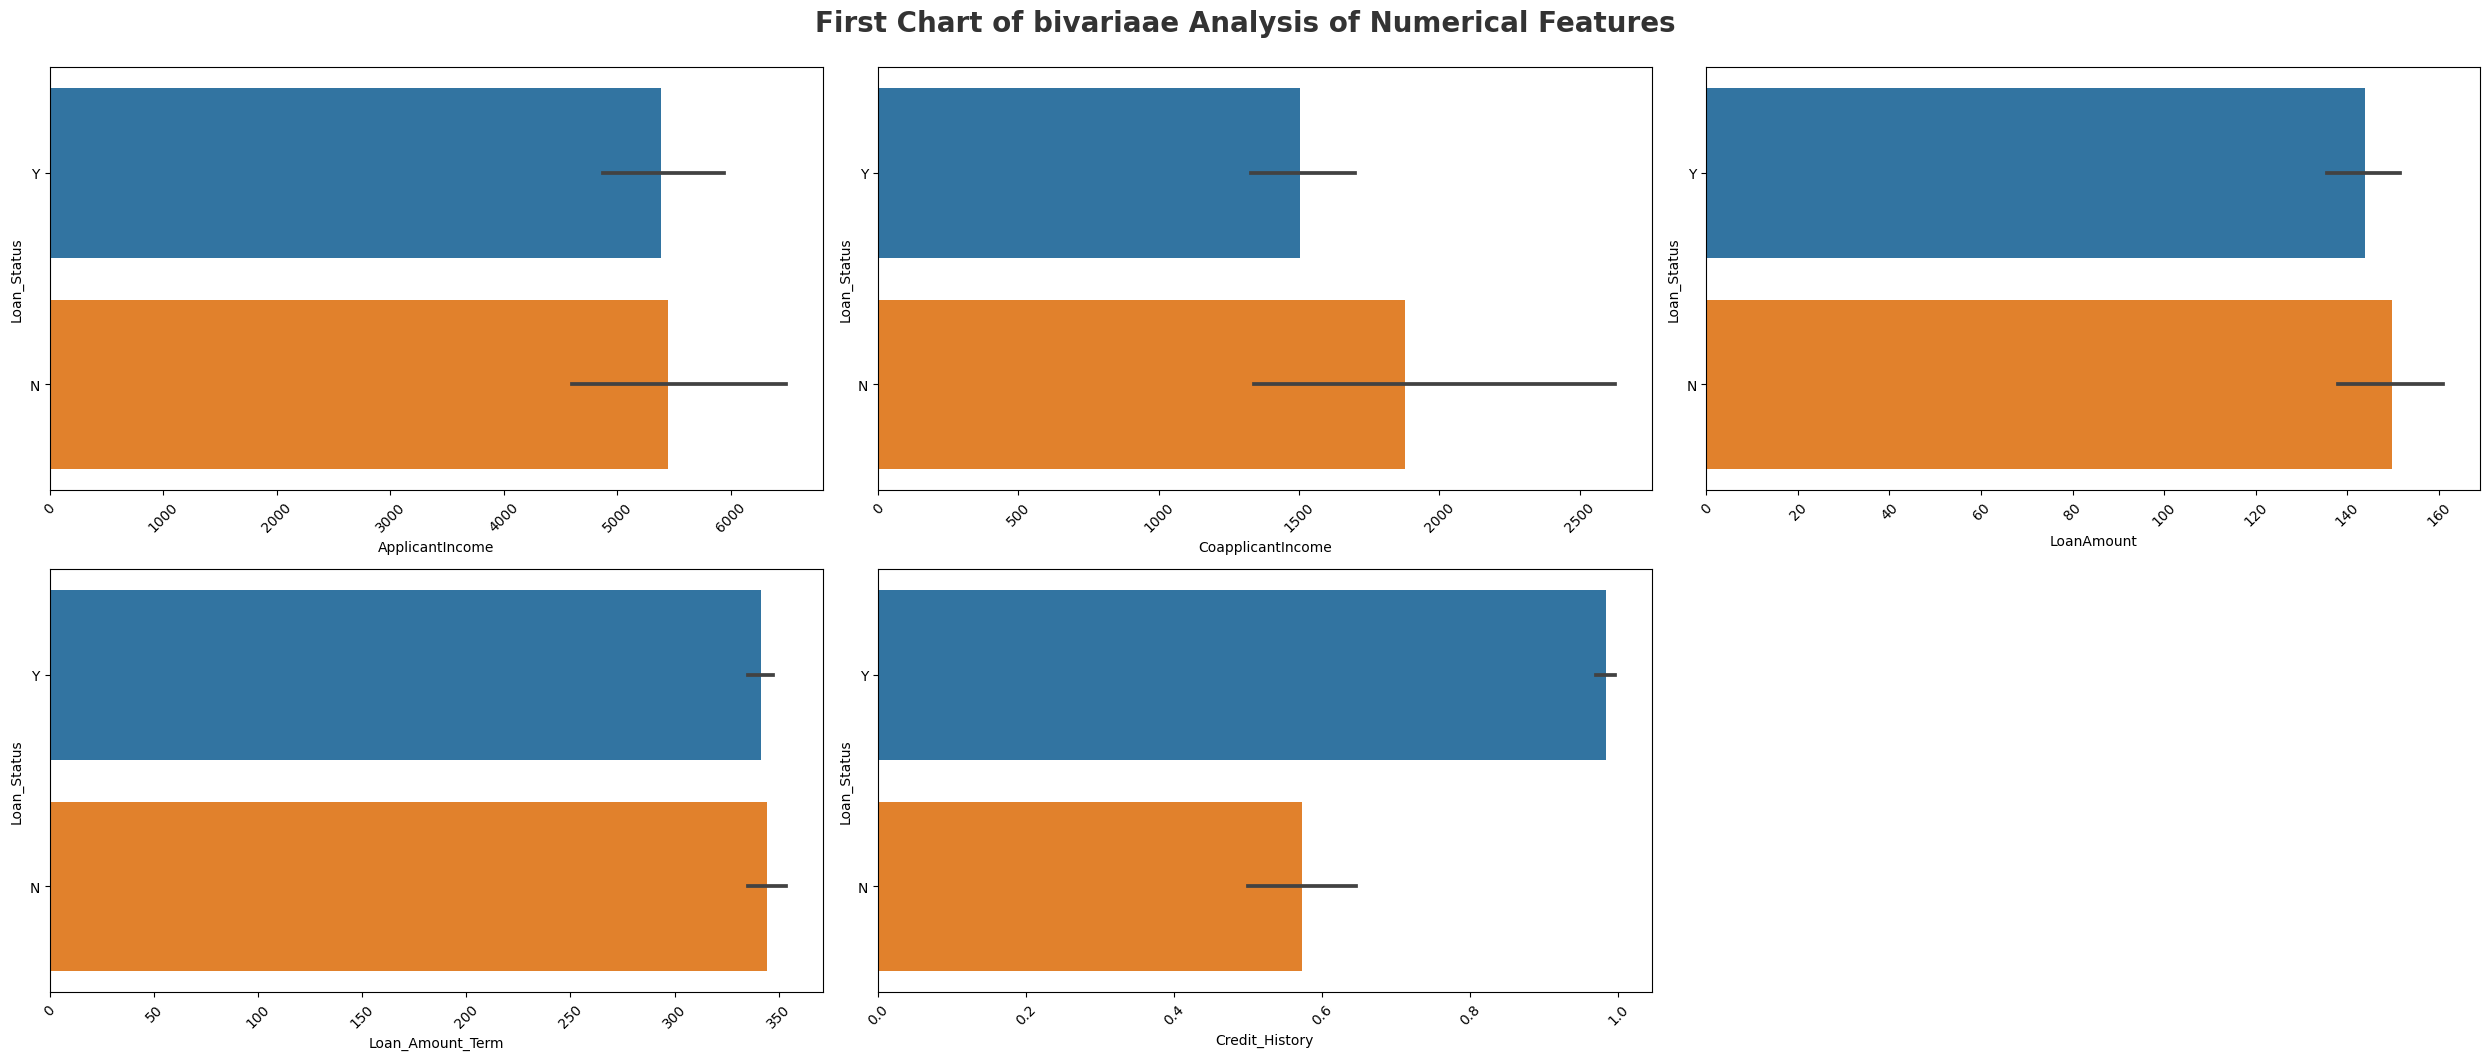

In [65]:
# plot for categorical columns
#numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariaae Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(numerical_cols)):
    plt.subplot(3, 3, i+1)
    sns.barplot(data = df, x = df[numerical_cols[i]], y='Loan_Status')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [67]:
df['Loan_Status']= df['Loan_Status'].replace({'Y':1,'N':0})

ValueError: num must be 1 <= num <= 6, not 7

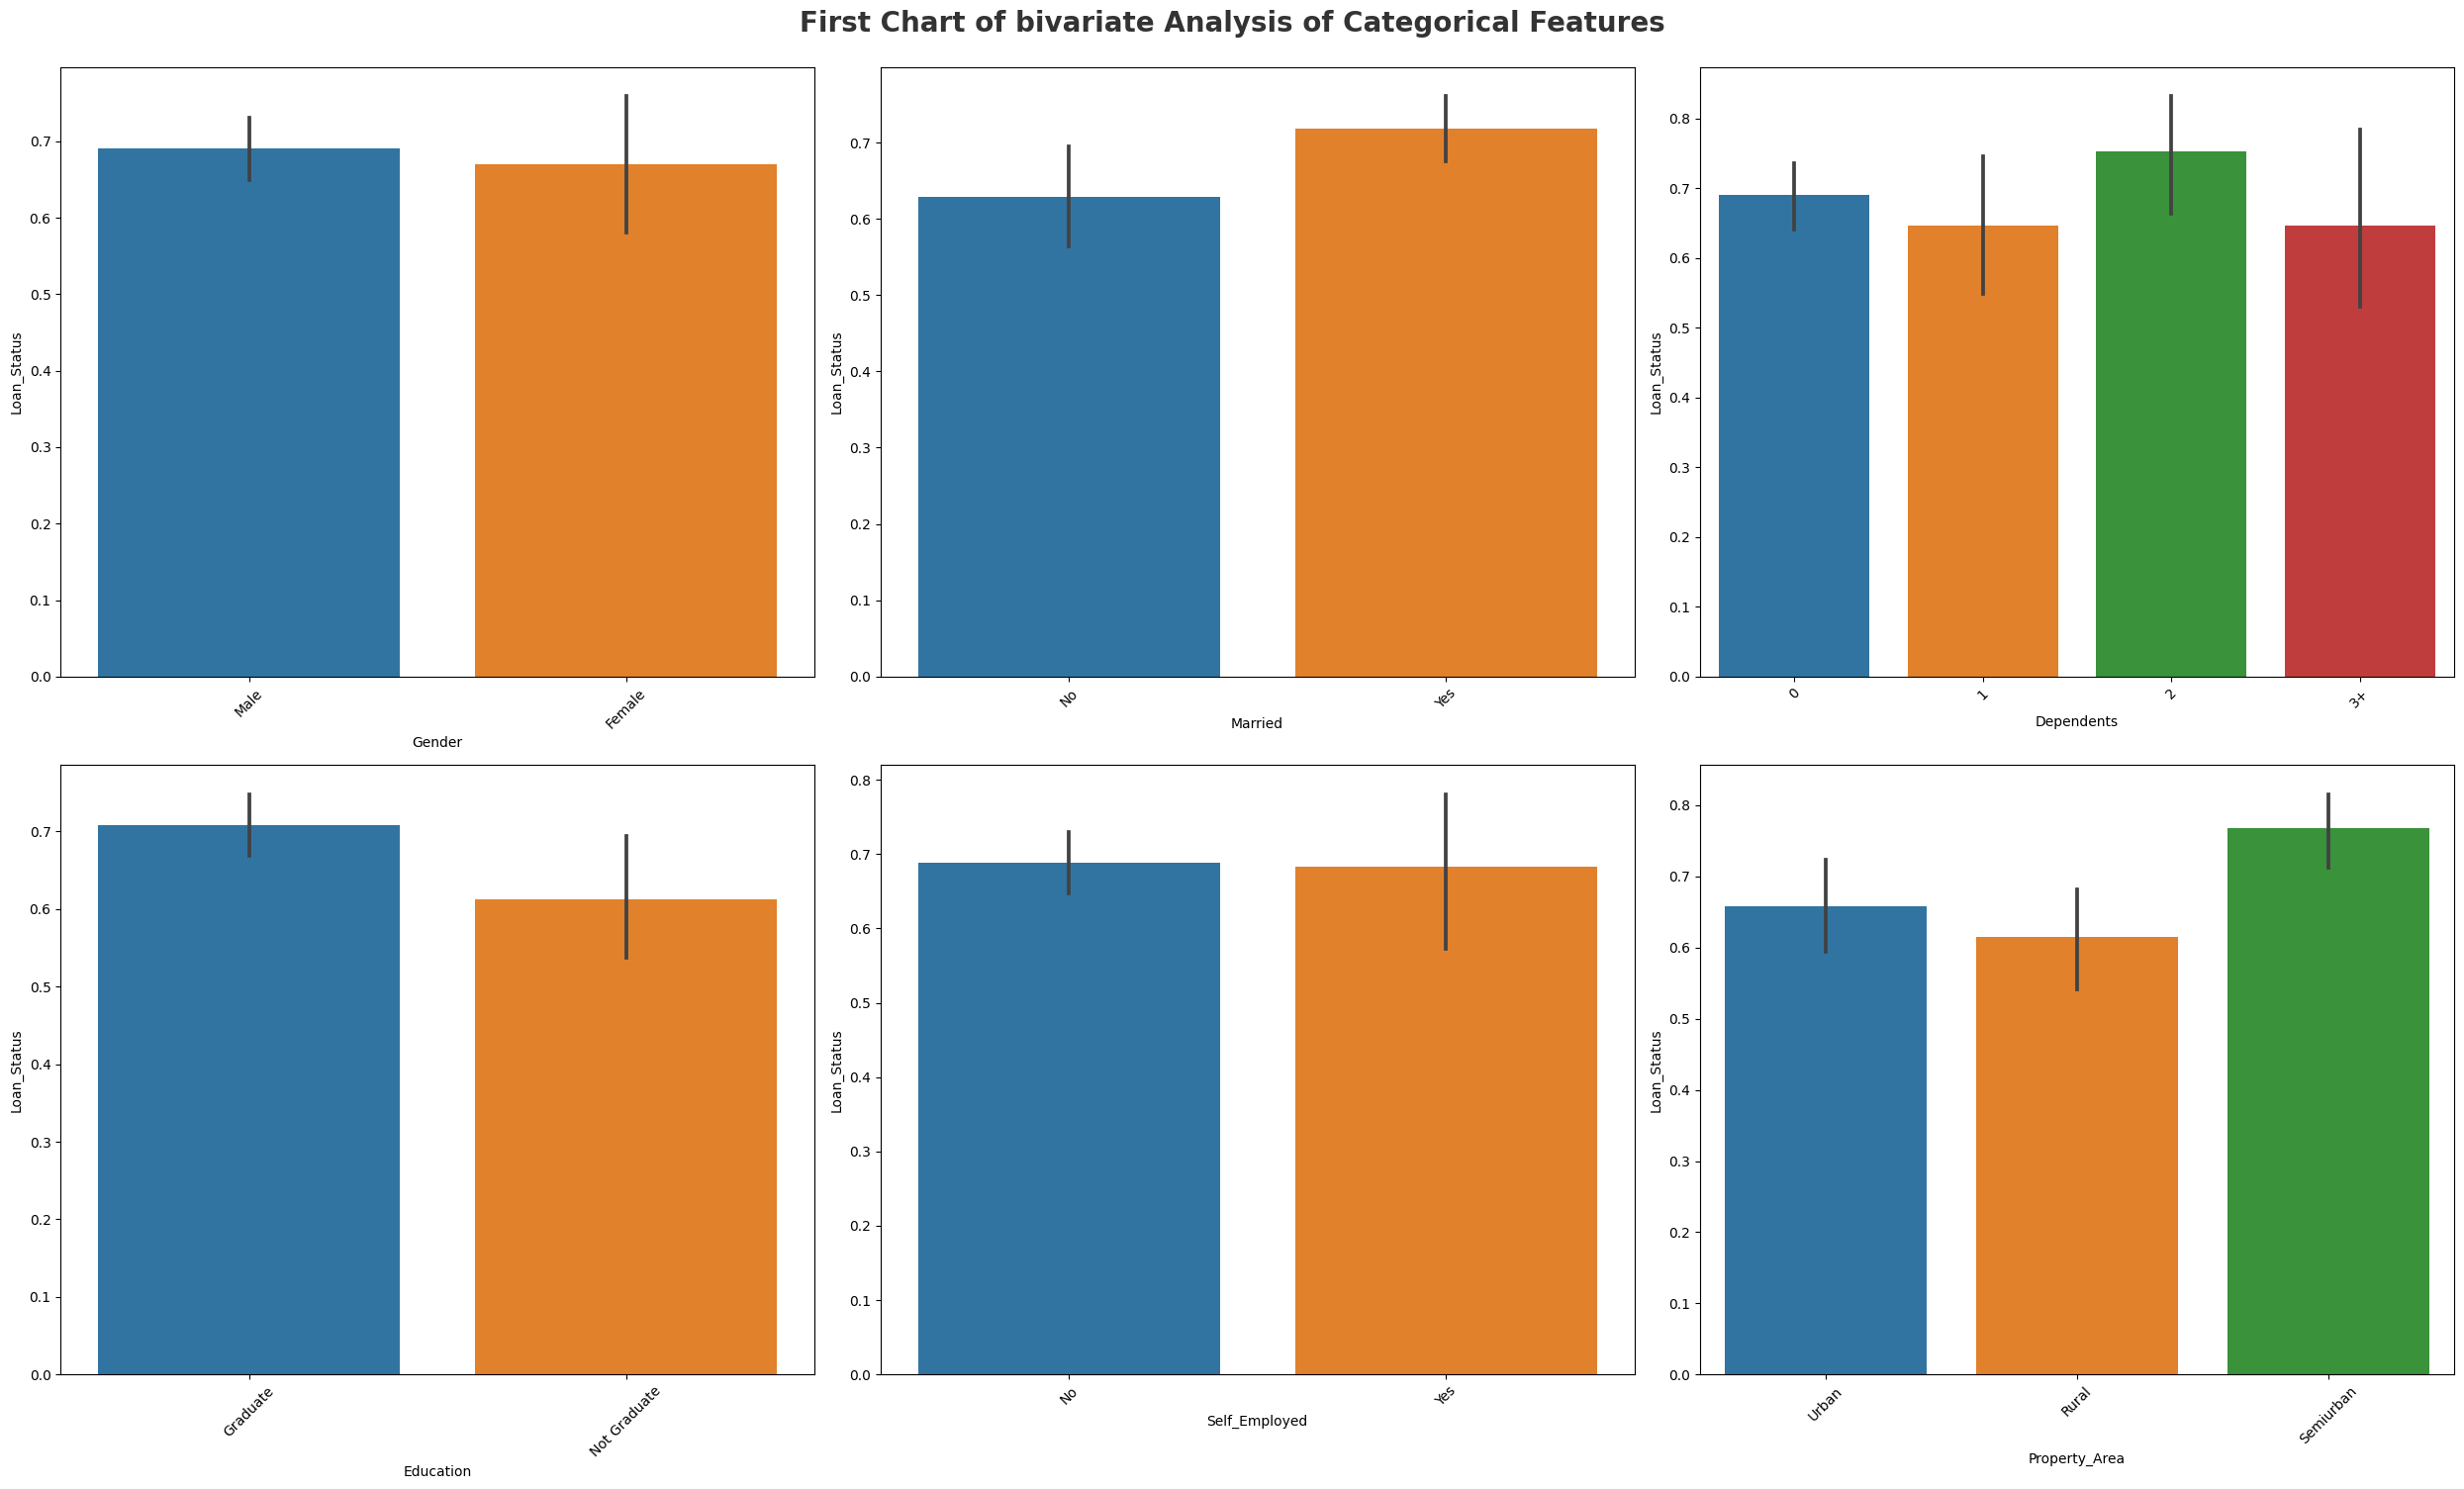

In [69]:
# plot for categorical columns
#categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(25, 15))
plt.suptitle('First Chart of bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1)
for i in range(0, len(categorical_cols)):
    plt.subplot(2, 3, i+1)
    sns.barplot(data = df, x = df[categorical_cols[i]], y='Loan_Status');
    plt.xticks(rotation=45)
    plt.tight_layout()

In [71]:
## Independent and dependent feature
X = df.drop(labels=['Loan_Status'],axis=1)
Y = df[['Loan_Status']]

In [72]:
# Define which columns should be ordinal-encoded and which should be scale
categorical_cols = X.select_dtypes(include='object') .columns
numerical_cols = X.select_dtypes(exclude='object').columns
print("numerical_columns: ",numerical_cols)
print("categorical columns: ",categorical_cols)

numerical_columns:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
categorical columns:  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')


In [75]:
# use label encoding on categorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in categorical_cols:
    X[i] = lable.fit_transform(X[i])
    df[i] = lable.fit_transform(df[i])

<AxesSubplot: >

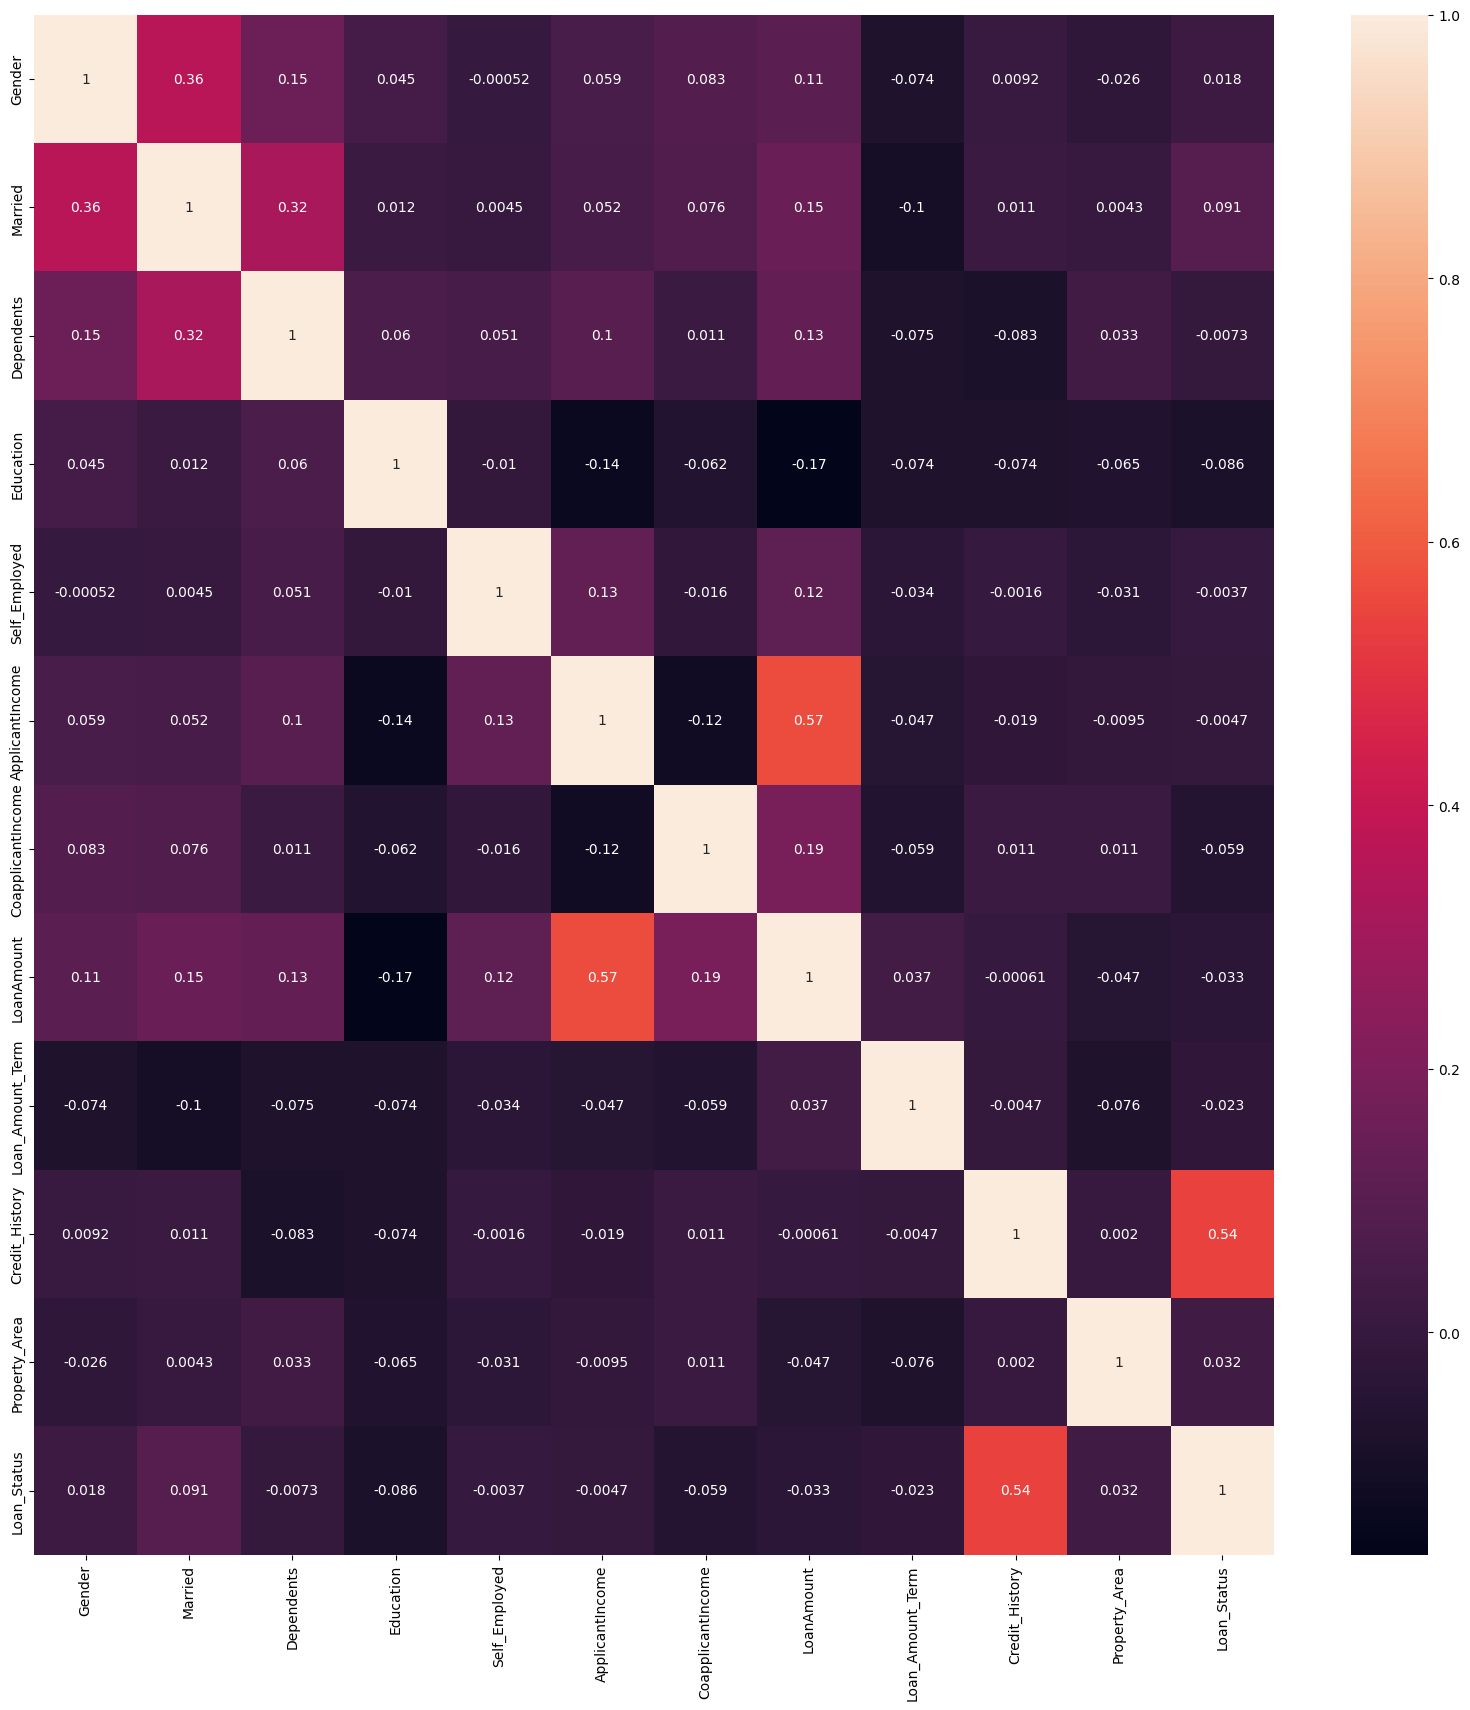

In [76]:
##correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [79]:
from sklearn.impute import SimpleImputer  # Handling missing values
from sklearn.preprocessing import StandardScaler  # Handling feature  scaling
from sklearn.preprocessing import OrdinalEncoder  # ordinal encodind
## Pipelines A
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [80]:
## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cat_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_cols),
    ("cat_pipline",cat_pipline,categorical_cols)
])

In [85]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())
X_train.head()

,num_pipline__ApplicantIncome,num_pipline__CoapplicantIncome,num_pipline__LoanAmount,num_pipline__Loan_Amount_Term,num_pipline__Credit_History,cat_pipline__Gender,cat_pipline__Married,cat_pipline__Dependents,cat_pipline__Education,cat_pipline__Self_Employed,cat_pipline__Property_Area
0,0.083915,0.180667,1.355734,0.287611,0.407763,0.483393,0.757442,-0.736442,-0.534173,-0.397516,-0.046951
1,-0.429338,0.385430,-0.197609,0.287611,0.407763,0.483393,0.757442,-0.736442,-0.534173,-0.397516,-0.046951
2,0.126095,0.005831,0.718168,0.287611,0.407763,0.483393,0.757442,1.062528,-0.534173,-0.397516,-0.046951
3,-0.576970,0.464185,-0.232385,0.287611,0.407763,0.483393,0.757442,-0.736442,-0.534173,-0.397516,-0.046951
4,-0.225522,-0.528127,-0.580149,0.287611,-2.452404,0.483393,-1.320234,-0.736442,-0.534173,-0.397516,-0.046951


In [100]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [101]:
# logestic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [109]:
logistic.score(X_train,y_train)

0.8187372708757638

In [102]:
y_pred_logistic = logistic.predict(X_test)

In [104]:
logistic_accuracy_score = accuracy_score(y_test,y_pred_logistic)
print("acuracy score of logistic reagressor: ",logistic_accuracy_score)

acuracy score of logistic reagressor:  0.7886178861788617


In [91]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train,y_train)

C:\Users\mohdalwaz\AppData\Local\Temp\ipykernel_13768\1037873354.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Randomforest.fit(X_train,y_train)


RandomForestClassifier()

In [108]:
Randomforest.score(X_train,y_train)

1.0

In [111]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=150,learning_rate=0.1)
adaboost.fit(X_train,y_train)

c:\Users\mohdalwaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [112]:
adaboost.score(X_train, y_train)

0.8309572301425662

In [114]:
#Dicision Tree classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [115]:
tree.score(X_train,y_train)

1.0

In [116]:
y_pred_tree = tree.predict(X_test)

In [117]:
accuracy_score(y_test, y_pred_tree)

0.6991869918699187